In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [4]:
# Bing Search API (free tier)

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', '6c591b95a7774b4d9e67ebaa05e690b7')

In [6]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [18]:
results = search_images_bing(key, 'Oak Tree Leaf')
ims = results.attrgot('content_url')
len(ims)

150

In [24]:
dest = 'images'
download_images(dest, urls=results.attrgot('contentUrl'))

In [7]:
path = Path('/home/jupyter/my_fastbook/images/trees')
tree_types = 'oak','birch','sycamore'

In [14]:
test_dir = (path/tree_types[2])
test_dir.mkdir(exist_ok = True)

In [15]:
# if not path.exists():
#     path.mkdir()
for o in tree_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    results = search_images_bing(key, f'{o} tree leaf')
    download_images(dest, urls = results.attrgot('contentUrl'))

In [16]:
fns = get_image_files(path)

In [17]:
fns

(#429) [Path('/home/jupyter/my_fastbook/images/trees/birch/00000137.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000060.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000015.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000124.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000054.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000007.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000121.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000087.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000078.jpg'),Path('/home/jupyter/my_fastbook/images/trees/birch/00000001.jpg')...]

In [19]:
failed = verify_images(fns)

In [20]:
failed.map(Path.unlink)

(#4) [None,None,None,None]

In [21]:
trees = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [22]:
dls = trees.dataloaders(path)

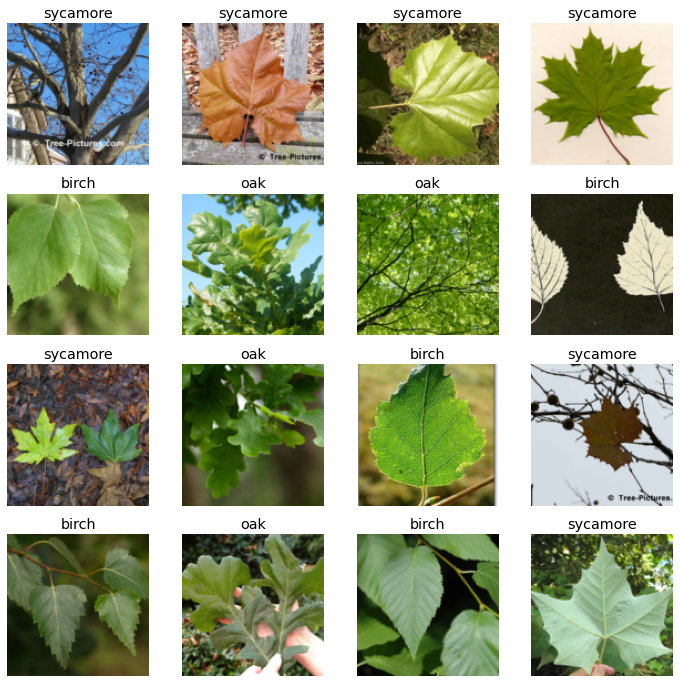

In [24]:
dls.valid.show_batch(max_n=16,nrows = 4)

In [ ]:
# Straight into model training

In [25]:
trees = trees.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = trees.dataloaders(path)

In [26]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jupyter/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.810132,1.239084,0.482353,00:08


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.088076,0.996090,0.388235,00:08
1,0.935916,0.783480,0.305882,00:09
2,0.854143,0.759468,0.235294,00:08
3,0.767513,0.726979,0.270588,00:09


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


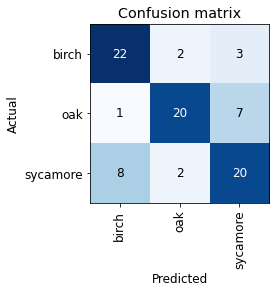

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

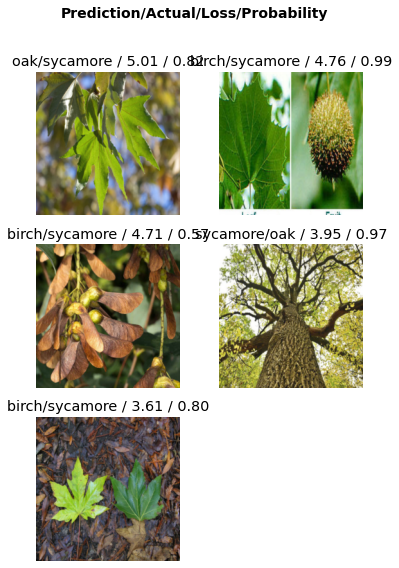

In [29]:
interp.plot_top_losses(5,nrows = 3)